# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
quarter_2021 = pd.read_csv('HELM/2021 by quarter.csv')
quarter_2022 = pd.read_csv('HELM/2022 by quarter.csv')

# Data Analysis & PreProcessing

In [3]:
quarter_2021.isna().sum()

BUCode                     4
MVPYear-Quarter            0
Today's Contracts       5470
Today's New Units        199
Today's Leased Units     199
Today's Used Units      6188
dtype: int64

In [4]:
# Removing records whose BUCode is Null for Quarter_2021 DF
quarter_2021 = quarter_2021.dropna(subset=['BUCode']).reset_index(drop=True)

In [5]:
quarter_2021

,BUCode,MVPYear-Quarter,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
0,05002,2021-Q1,388.0,156.0,154.0,154.0
1,05002,2021-Q2,512.0,200.0,128.0,211.0
2,05002,2021-Q3,466.0,153.0,102.0,110.0
3,05002,2021-Q4,449.0,153.0,99.0,175.0
4,05037,2021-Q1,17.0,32.0,7.0,165.0
...,...,...,...,...,...,...
16405,S0206,2021-Q4,7390.0,NaN,NaN,NaN
16406,S0209,2021-Q3,1551.0,NaN,NaN,NaN
16407,S0211,2021-Q3,7564.0,NaN,NaN,NaN
16408,S0211,2021-Q4,2466.0,NaN,NaN,NaN


In [6]:
# Removing records whose BUCode is Null for Quarter_2022 DF
quarter_2022 = quarter_2022.dropna(subset=['BUCode']).reset_index(drop=True)

In [7]:
quarter_2022

,BUCode,MVPYear-Quarter,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
0,05002,2022-Q1,418.0,172.0,104.0,103.0
1,05002,2022-Q2,370.0,155.0,96.0,162.0
2,05002,2022-Q3,277.0,157.0,51.0,118.0
3,05002,2022-Q4,262.0,102.0,72.0,39.0
4,05037,2022-Q1,2.0,21.0,6.0,69.0
...,...,...,...,...,...,...
16917,S0212,2022-Q1,19.0,NaN,NaN,NaN
16918,S0212,2022-Q2,13.0,NaN,NaN,NaN
16919,S0212,2022-Q3,17.0,NaN,NaN,NaN
16920,S0212,2022-Q4,7.0,NaN,NaN,NaN


In [8]:
# Combining two years dataframes
quarter_df = pd.concat([quarter_2021, quarter_2022], axis=0)

In [9]:
quarter_df = quarter_df.reset_index(drop=True)

In [10]:
quarter_df

,BUCode,MVPYear-Quarter,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
0,05002,2021-Q1,388.0,156.0,154.0,154.0
1,05002,2021-Q2,512.0,200.0,128.0,211.0
2,05002,2021-Q3,466.0,153.0,102.0,110.0
3,05002,2021-Q4,449.0,153.0,99.0,175.0
4,05037,2021-Q1,17.0,32.0,7.0,165.0
...,...,...,...,...,...,...
33327,S0212,2022-Q1,19.0,NaN,NaN,NaN
33328,S0212,2022-Q2,13.0,NaN,NaN,NaN
33329,S0212,2022-Q3,17.0,NaN,NaN,NaN
33330,S0212,2022-Q4,7.0,NaN,NaN,NaN


In [11]:
# Asserting concatenation
quarter_df.shape[0] == quarter_2021.shape[0] + quarter_2022.shape[0]

True

In [12]:
# Removing records whose BUCode starts with 'S' 
quarter_df = quarter_df[~quarter_df['BUCode'].str.contains('S', case=False)].reset_index(drop=True)

In [13]:
quarter_df['BUCode'].str.len().unique()

array([5], dtype=int64)

In [14]:
quarter_df.isna().sum()

BUCode                      0
MVPYear-Quarter             0
Today's Contracts       11580
Today's New Units         163
Today's Leased Units      163
Today's Used Units      15295
dtype: int64

<AxesSubplot:>

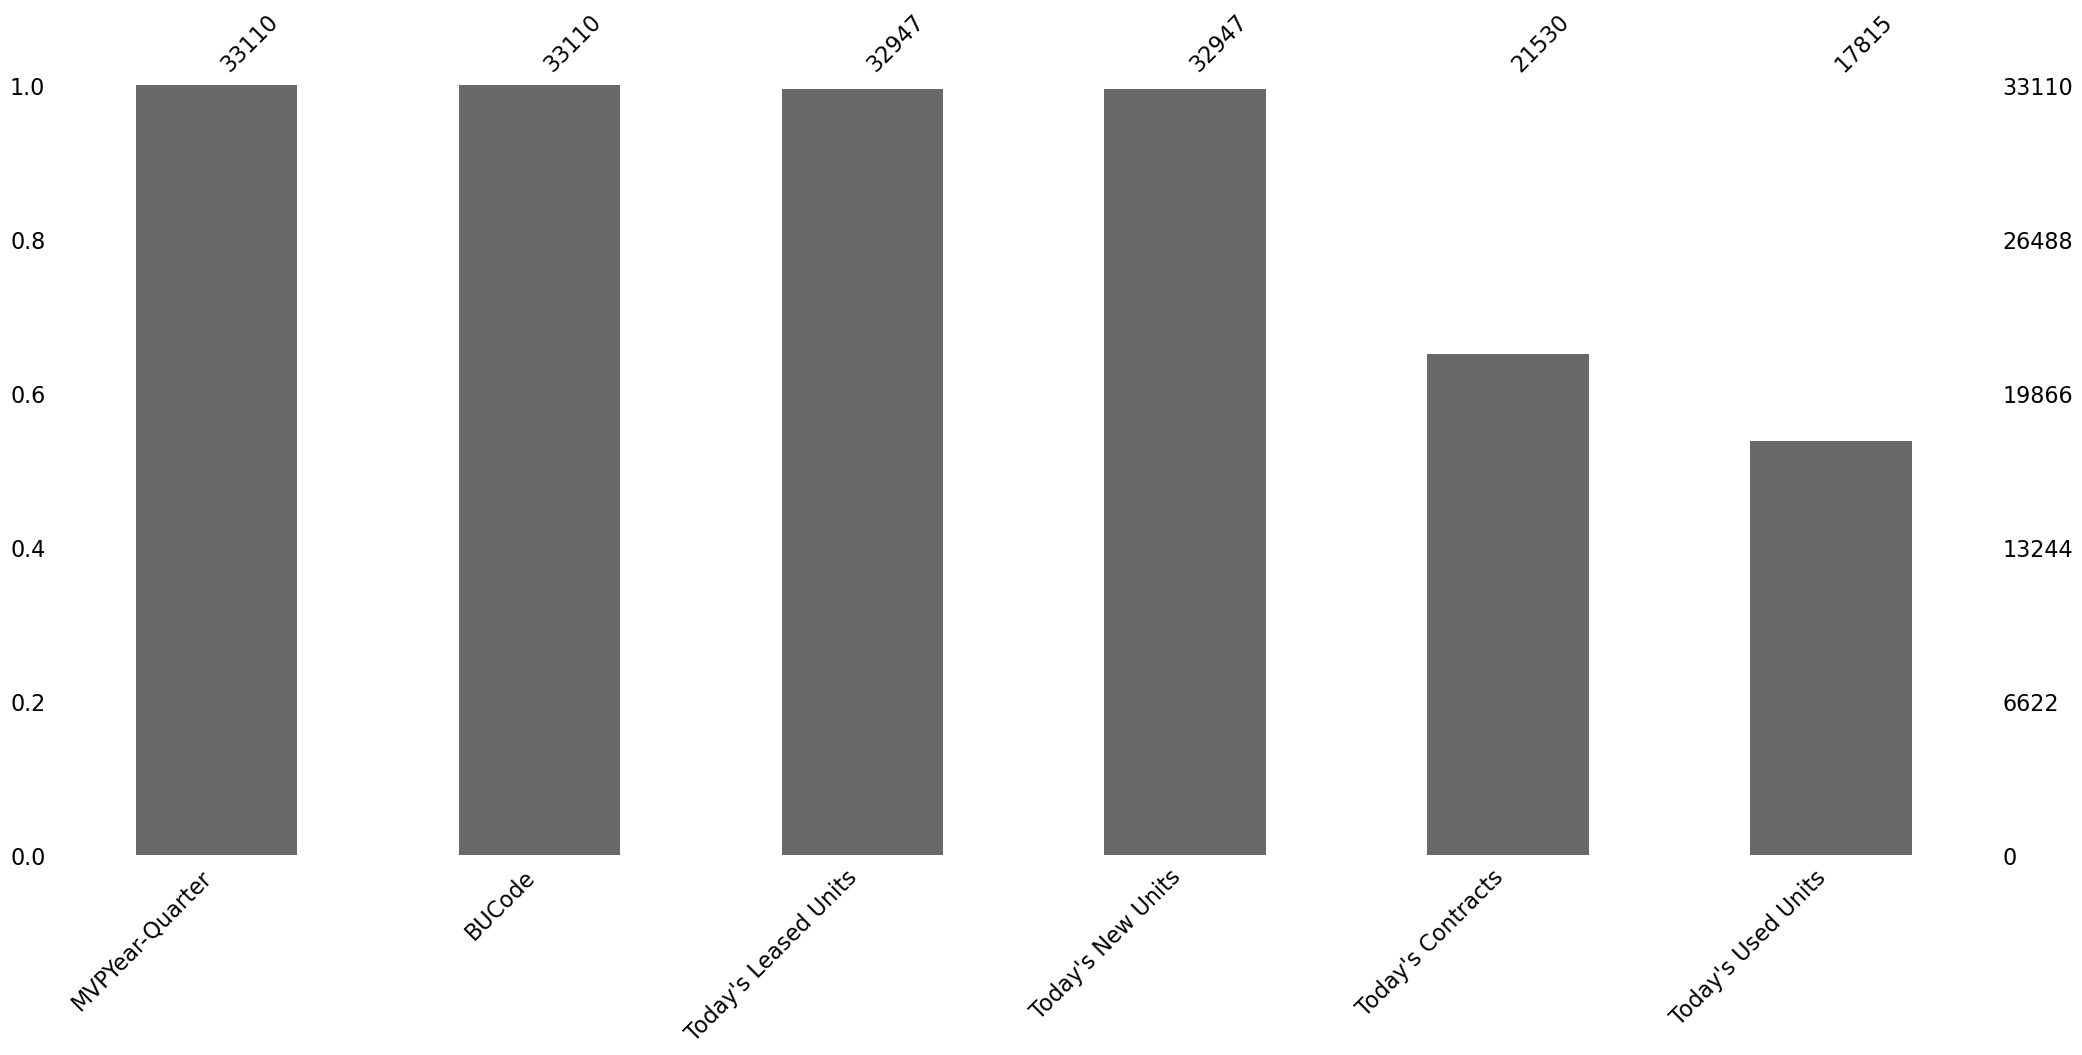

In [15]:
# Identifying the missing records for each column
missingno.bar(quarter_df, sort='descending')

In [16]:
quarter_df.shape

(33110, 6)

In [17]:
quarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33110 entries, 0 to 33109
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BUCode                33110 non-null  object 
 1   MVPYear-Quarter       33110 non-null  object 
 2   Today's Contracts     21530 non-null  float64
 3   Today's New Units     32947 non-null  float64
 4   Today's Leased Units  32947 non-null  float64
 5   Today's Used Units    17815 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


In [18]:
quarter_df.describe()

,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
count,21530.000000,32947.000000,32947.000000,17815.000000
mean,98.746772,63.368349,17.843749,148.144822
std,182.205936,97.342636,52.493004,138.430656
min,-1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,60.000000
50%,33.000000,27.000000,0.000000,112.000000
75%,115.000000,87.000000,11.000000,195.000000
max,3203.000000,1531.000000,1257.000000,1939.000000


In [19]:
# Removing records whose column values are less than 0
quarter_df = quarter_df[quarter_df["Today's Contracts"] >= 0].reset_index(drop=True)

In [20]:
quarter_df.describe()

,Today's Contracts,Today's New Units,Today's Leased Units,Today's Used Units
count,21526.000000,21440.000000,21440.000000,16328.000000
mean,98.765307,94.915765,27.202285,154.497795
std,182.217790,107.329762,63.070729,141.149502
min,0.000000,0.000000,0.000000,0.000000
25%,5.000000,25.000000,0.000000,64.000000
50%,33.000000,63.000000,5.000000,118.000000
75%,115.000000,127.000000,25.000000,202.000000
max,3203.000000,1531.000000,1257.000000,1939.000000


<AxesSubplot:xlabel="Today's Used Units", ylabel='Count'>

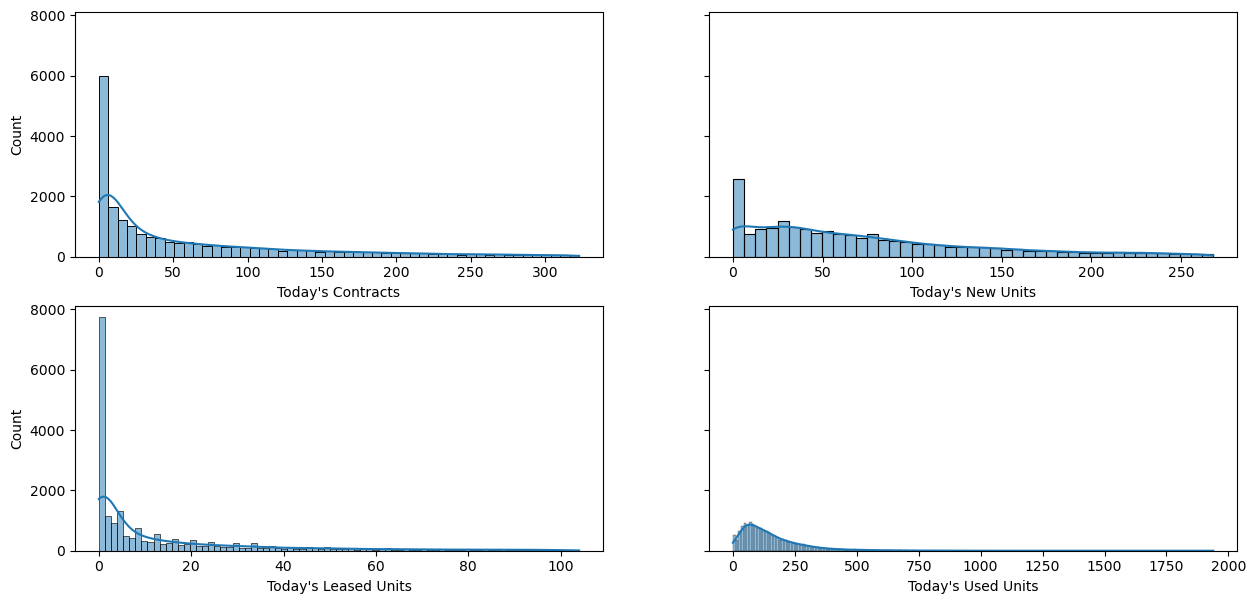

In [21]:
# Plotting the columns
fig, ax = plt.subplots(2, 2, figsize=(15,7), sharey=True)
sns.histplot(ax=ax[0][0], data=quarter_df["Today's Contracts"].sort_values()[:20000], kde=True)
sns.histplot(ax=ax[0][1], data=quarter_df["Today's New Units"].sort_values()[:20000], kde=True)
sns.histplot(ax=ax[1][0], data=quarter_df["Today's Leased Units"].sort_values()[:20000], kde=True)
sns.histplot(ax=ax[1][1], data=quarter_df["Today's Used Units"].sort_values()[:20000], kde=True)

In [22]:
quarter_df.columns

Index(['BUCode', 'MVPYear-Quarter', 'Today's Contracts', 'Today's New Units',
       'Today's Leased Units', 'Today's Used Units'],
      dtype='object')

In [23]:
# Function to set the Axes labels
def set_ax_labels(ax):
    for i in ax.containers:
        ax.bar_label(i,)

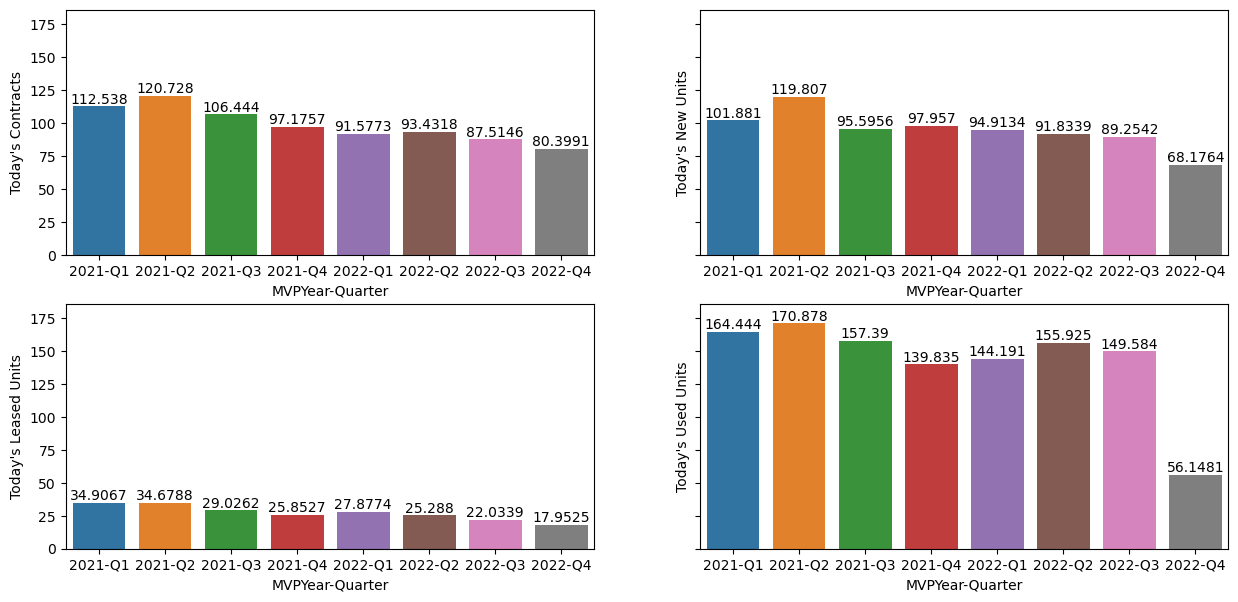

In [24]:
# Plotting the same columns with some additional information
fig, ax = plt.subplots(2, 2, figsize=(15,7), sharey=True)
ax_1 = sns.barplot(ax=ax[0][0], data=quarter_df, x="MVPYear-Quarter", y="Today's Contracts", errwidth=0)
set_ax_labels(ax_1)
ax_2 = sns.barplot(ax=ax[0][1], data=quarter_df, x="MVPYear-Quarter", y="Today's New Units", errwidth=0)
set_ax_labels(ax_2)
ax_3 = sns.barplot(ax=ax[1][0], data=quarter_df, x="MVPYear-Quarter", y="Today's Leased Units", errwidth=0)
set_ax_labels(ax_3)
ax_4 = sns.barplot(ax=ax[1][1], data=quarter_df, x="MVPYear-Quarter", y="Today's Used Units", errwidth=0)
set_ax_labels(ax_4)
plt.show()

In [25]:
# Data Imputation for filling NaN/Null values
for float_col in quarter_df.columns[2:]:
    quarter_df[float_col].fillna(quarter_df[float_col].mean(), inplace=True)

In [26]:
quarter_df.isna().sum()

BUCode                  0
MVPYear-Quarter         0
Today's Contracts       0
Today's New Units       0
Today's Leased Units    0
Today's Used Units      0
dtype: int64

<AxesSubplot:xlabel="Today's Used Units", ylabel='Count'>

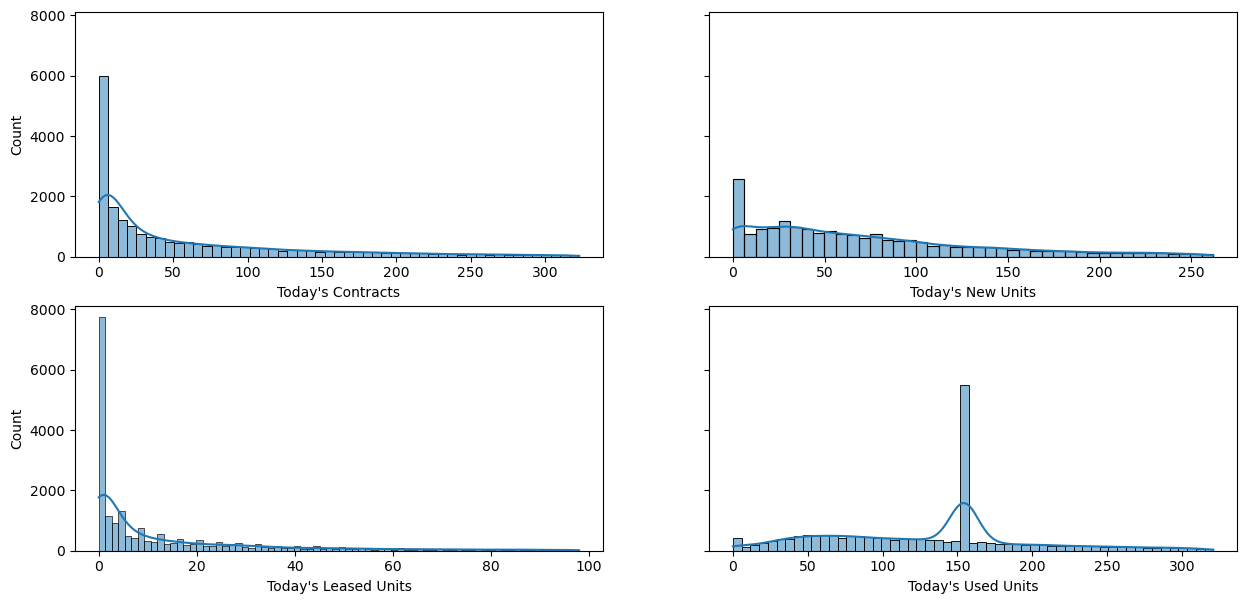

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(15,7), sharey=True)
sns.histplot(ax=ax[0][0], data=quarter_df["Today's Contracts"].sort_values()[:20000], kde=True)
sns.histplot(ax=ax[0][1], data=quarter_df["Today's New Units"].sort_values()[:20000], kde=True)
sns.histplot(ax=ax[1][0], data=quarter_df["Today's Leased Units"].sort_values()[:20000], kde=True)
sns.histplot(ax=ax[1][1], data=quarter_df["Today's Used Units"].sort_values()[:20000], kde=True)

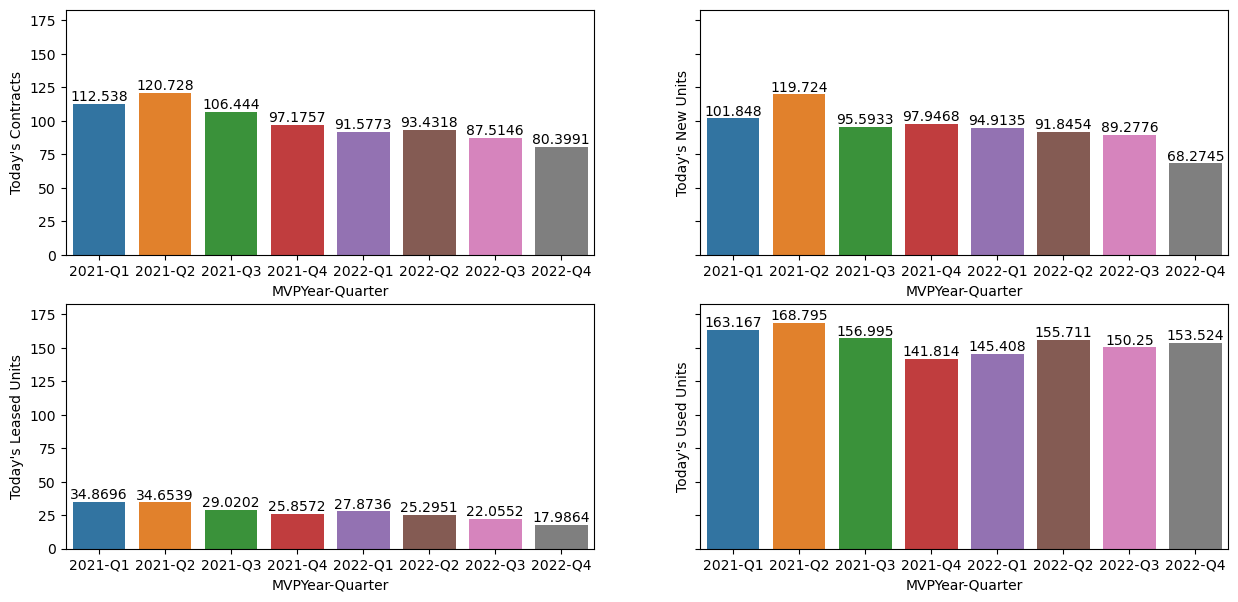

In [28]:
fig, ax = plt.subplots(2, 2, figsize=(15,7), sharey=True)
ax_1 = sns.barplot(ax=ax[0][0], data=quarter_df, x="MVPYear-Quarter", y="Today's Contracts", errwidth=0)
set_ax_labels(ax_1)
ax_2 = sns.barplot(ax=ax[0][1], data=quarter_df, x="MVPYear-Quarter", y="Today's New Units", errwidth=0)
set_ax_labels(ax_2)
ax_3 = sns.barplot(ax=ax[1][0], data=quarter_df, x="MVPYear-Quarter", y="Today's Leased Units", errwidth=0)
set_ax_labels(ax_3)
ax_4 = sns.barplot(ax=ax[1][1], data=quarter_df, x="MVPYear-Quarter", y="Today's Used Units", errwidth=0)
set_ax_labels(ax_4)
plt.show()

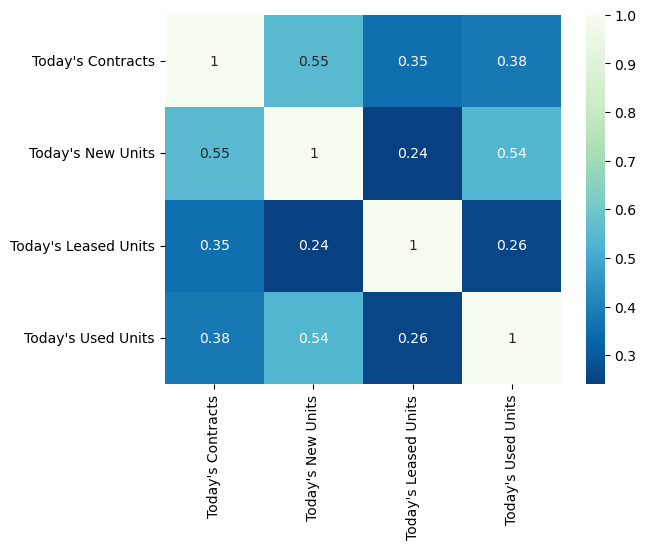

In [29]:
sns.heatmap(quarter_df.corr(), cmap='GnBu_r', annot=True)
plt.show()

In [30]:
# Storing the quarter dataframe into Quarter Final Output CSV in local
quarter_df.to_csv('HELM/Quater_Final_Output.csv', index=False)